## elemenrary matrix , LU decomposition

In [1]:
import numpy as np
import scipy

In [7]:
# Elementary matrix : In mathematics, an elementary matrix is a matrix which differs from the identity matrix by one single elementary row operation
# 1. Row switching
# 2. Row multiplication
# 3, Row addition

# case1 switch two rows
def switch_rows(A, i, j):
    m,n = A.shape
    E = np.eye(m)
    E[i,i] = 0; E[j,j] = 0
    E[i,j] = 1; E[j,i] = 1
    return E,E @ A

x= np.arange(12).reshape(3,4)
print(x)
print(switch_rows(x, 0, 1)[-1])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 4.  5.  6.  7.]
 [ 0.  1.  2.  3.]
 [ 8.  9. 10. 11.]]


In [20]:
# permutation matrix to switch rows
def switch_rows_permutation(A, source_list, target_list):
    m,n = A.shape
    P = np.eye(m)
    for i in range(len(source_list)):
        P[source_list[i], source_list[i]] = 0
        P[target_list[i], target_list[i]] = 0
        P[source_list[i], target_list[i]] = 1
        P[target_list[i], source_list[i]] = 1
    return P @ A
x = np.arange(16).reshape(4,4)
print(x)
switch_rows_permutation(x, [0,1],[3,2])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


array([[12., 13., 14., 15.],
       [ 8.,  9., 10., 11.],
       [ 4.,  5.,  6.,  7.],
       [ 0.,  1.,  2.,  3.]])

In [4]:
# communication matrix for transpose matrix
# x[i,j] = x[i*n+j] -> 对于Python, matlab按行展开
x = np.arange(12).reshape(4,3)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        print(f"{x[i,j]} , {x.flatten()[i*x.shape[1]+j]}")

In [5]:
def transpose_by_commuinication_matrix(x):
    m, n = x.shape
    y = np.zeros((m*n,m*n))
    x_flatten = x.flatten()
    for i in range(m):
        for j in range(i,n):
            if i == j:
              # 如果是对角线元素，则不改变，因此在communication matrix中[i*n+j,i*n+j] = 1
              y[i*n+j,i*n+j] = 1
            else:
              # tranpose x[i,j] and x[j,i]
              # 如果非对角线元素，则交换x[i,j]与x[j,i]- > x[i,j]在flatten中为i*n+j行，x[j,i]在flatten中为j*n+i行，因此是i*n+j,j*n+i=1表示第i*n+j行的元素是原来第j*n+i行，j*n+i,i*n+1=1第j*n+i行的元素是原来第i*n+j行
              y[i*n+j,j*n+i] = 1
              y[j*n+i,i*n+j] = 1
    return y.dot(x_flatten).reshape(n,m),y

In [3]:
x = np.arange(9).reshape(3,3)
print(x)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [17]:
# exchange matrix
def echange_matrix(n):
    x = np.zeros((n,n))
    for i in range(n):
        x[i,n-1-i] = 1
    return x
# test exchange matrix
x = echange_matrix(4)
test=np.random.rand(4,4)
print(test)
print(x@test)

[[0.29817673 0.5668421  0.00673651 0.92867801]
 [0.74563511 0.58834465 0.4878704  0.37604444]
 [0.0742193  0.3063073  0.98769045 0.39777847]
 [0.42357609 0.10708826 0.14831382 0.2010552 ]]
[[0.42357609 0.10708826 0.14831382 0.2010552 ]
 [0.0742193  0.3063073  0.98769045 0.39777847]
 [0.74563511 0.58834465 0.4878704  0.37604444]
 [0.29817673 0.5668421  0.00673651 0.92867801]]


In [9]:
x = echange_matrix(4)

In [33]:
# LU decomposition by Scipy
from scipy.linalg import lu
A = np.array([
    [5,2,-4,0],
    [2,1,-2,1],
    [-4,-2,5,0],
    [0,1,0,2]
])
P,L,U = lu(A)
print(U)
P @ A == L @ U

[[ 5.          2.         -4.          0.        ]
 [ 0.          1.          0.          2.        ]
 [ 0.          0.          1.8         0.8       ]
 [ 0.          0.          0.          0.77777778]]


array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [62]:
# LU decomposition by procedure program

import numpy as np
from copy import deepcopy

class naive_lup:
    def __init__(self,A) -> None:
        self.matrix = A
    
    @staticmethod
    def switch_pivot(A,k):
        column_A = A[:,k]
        lower_array = np.abs(column_A[k+1:])
        max_index = np.argmax(lower_array)
        if lower_array[max_index].item() > np.abs(column_A[k]).item():
            P,A = switch_rows(A,k,k+1+max_index)
        else:
            P = np.eye(A.shape[0])
        return P,A


    @staticmethod
    def eliminate_column(A,k):
        m,n = A.shape
        elimination_matrix = np.eye(m)
        for i in range(k+1,m):
            elimination_matrix[i,k] = -A[i,k]/A[k,k]
        return elimination_matrix, elimination_matrix @ A


    def lup(self):
        """
        matrix implementation of LU decomposition with partial pivoting
        """
        m,n = self.matrix.shape
        A = deepcopy(self.matrix)
        P_list = []
        M_list = []
        for i in range(n-1):
            # avoid 0 and interchange rows to geter larger pivots
            P,A = self.switch_pivot(A,i) # bug
            M,A = self.eliminate_column(A,i)
            # print(f"{i}\neliminate column:{A}\n,elimination matrix:{M}")
            P_list.append(P)
            M_list.append(M)
        P = np.eye(m)
        L_inv = np.eye(m)
        for i in range(len(P_list)-1,-1,-1):
            P = P @ P_list[i]
            if i != 0:
                L_inv = L_inv @ M_list[i] @ P_list[i]
            else:
                L_inv = L_inv @ M_list[i]
                for k in range(1,len(P_list)):
                    L_inv = L_inv @ P_list[k]
        L = np.linalg.inv(L_inv)
        return P,L,A
    
    def doolittile(self):
        """
        suppose we don't nedd to interchange any row, and suppose for a square matrix
        """
        m,_ = self.matrix.shape
        A = deepcopy(self.matrix)
        L = np.eye(m)
        U = np.zeros((m,m))
        for i in range(m):
            for j in range(i,m):
                U[i,j] = A[i,j] - L[i,:i] @ U[:i,j] # don't need to dive U[i,i] as the diagnal of L is 1
            for j in range(i+1,m):
                L[j,i] = (A[j,i] - L[j,:i] @ U[:i,i])/U[i,i]
        return L,U  


In [65]:
B = np.array([
    [-2,2,-1],
    [6,-6,7],
    [3,-8,4]
])
x = naive_lup(B)
P,L,U = x.lup()
print(U)
P@B == L@U

[[ 6.         -6.          7.        ]
 [ 0.         -5.          0.5       ]
 [ 0.          0.          1.33333333]]


array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [66]:
x = naive_lup(A)
P,L,U = x.lup()
print(U)
P@A == L@U

[[  5.           2.          -4.           0.        ]
 [  0.          25.          -1.80327869 -13.19672131]
 [  0.           0.           1.08790965   1.33360146]
 [  0.           0.           0.           0.58297994]]


array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True, False,  True],
       [ True, False,  True, False]])

In [63]:
permutation_a = P @ A
d_L,d_U = naive_lup(permutation_a).doolittile()
print(permutation_a == d_L @ d_U)


[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True False  True]
 [ True  True  True  True]]


## pseudo-inverse matrix


In [3]:
a = np.array([
    [7,12,7,6,6],
    [17,32,18,15,14],
    [14,20,12,14,16],
    [15,16,11,14,18]
])

In [135]:
import copy
from copy import deepcopy
def get_column(A,j):
    return A[:,j].reshape(-1,1)
def get_submatrix(A,i):
    if i == 0:
        return A[:,0].reshape(-1,1)
    else:
        return A[:,0:i+1]
def column_recursive_pinv(A):
    m,n = A.shape
    a1 = get_column(A,0)
    a1_p = np.linalg.inv(a1.T @ a1) @ a1.T
    A_p_k = a1_p
    for i in range(1,n):
        ak = get_column(A,i) #[m,1]
        d = A_p_k @ ak #[i,m]@[m,1]
        c = ak - get_submatrix(A,i-1) @ d
        if np.allclose(c,np.zeros_like(c)):
            b = 1/(1 + d.T @ d ) * d.T @ A_p_k
        else:
            b =  column_recursive_pinv(c)
        A_p_k = np.concatenate([A_p_k - d @ b , b],axis=0)
    return A_p_k

print(column_recursive_pinv(a))
print(np.allclose(column_recursive_pinv(a),np.linalg.pinv(a)))

[[ 0.24652295  0.09040334 -0.63212796  0.41968011]
 [-0.08770021  0.00601193  0.24803715 -0.20248777]
 [ 0.13936247  0.07012428 -0.34938759  0.20717619]
 [-0.17485082 -0.08291085  0.45244291 -0.2559895 ]
 [-0.06769034 -0.06263179  0.16970254 -0.04348558]]
True


$A^{\dagger}$是$A^{(1,3)}$与$A^{(1,4)}$的特殊情况

- $A^{(1,3)}={A^{(1,3)}+(In-A^{(1,3)}A)Z|Z\in \mathbb{C} ^{5\times 4}}$ 

- $A^{(1,4)}={A^{(1,4)}+Z(In-AA^{(1,4)})|Z\in \mathbb{C} ^{5\times 4}}$ 

In [136]:
a@column_recursive_pinv(a)

array([[ 0.19354839,  0.32258065, -0.16129032,  0.16129032],
       [ 0.32258065,  0.87096774,  0.06451613, -0.06451613],
       [-0.16129032,  0.06451613,  0.96774194,  0.03225806],
       [ 0.16129032, -0.06451613,  0.03225806,  0.96774194]])

In [137]:
column_recursive_pinv(a)@a

array([[ 0.70792768, -0.07649513,  0.38386648, -0.13908206,  0.18497914],
       [-0.07649513,  0.86091794,  0.2433936 ,  0.20166898, -0.11821975],
       [ 0.38386648,  0.2433936 ,  0.3240612 , -0.10292072, -0.04311544],
       [-0.13908206,  0.20166898, -0.10292072,  0.45757997,  0.42141864],
       [ 0.18497914, -0.11821975, -0.04311544,  0.42141864,  0.64951321]])

/tmp/ipykernel_917349/1937346743.py:12: RuntimeWarning: invalid value encountered in sqrt
  y1 = np.sqrt((12 - x**2) / 6)


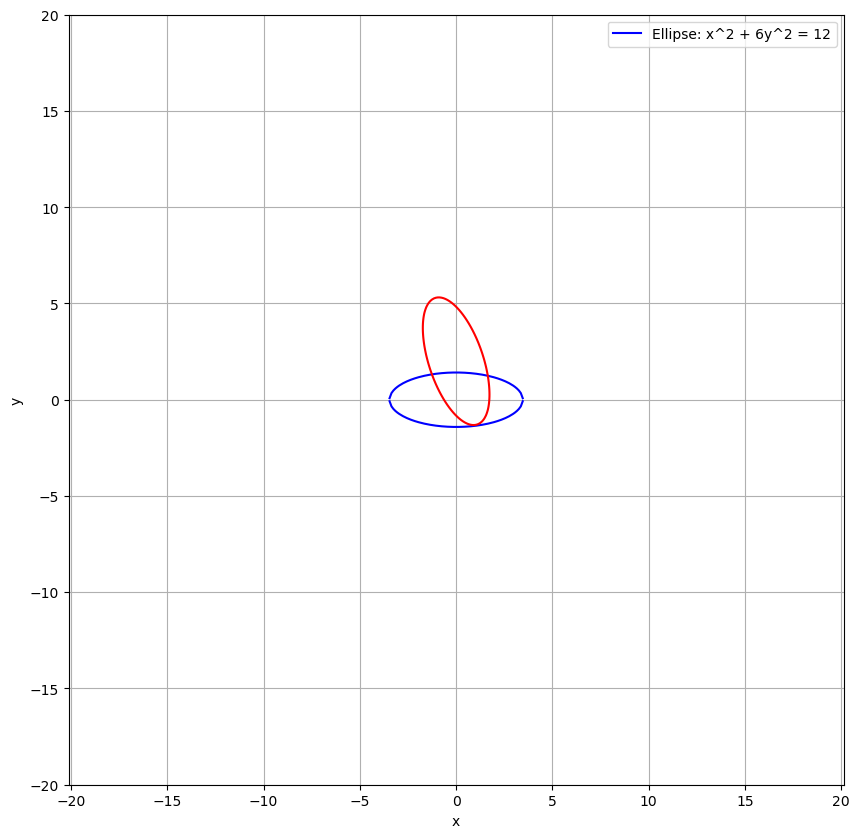

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# 创建一个新的图形，设置图形的大小为10x10
plt.figure(figsize=(10, 10))

# 扩大x和y的数值范围
x = np.linspace(-20, 20, 400)
y = np.linspace(-20, 20, 400)

# 计算对应的y值
y1 = np.sqrt((12 - x**2) / 6)

# 画出第一个椭圆的上半部分和下半部分，使用蓝色，并添加标签
plt.plot(x, y1, 'b', label='Ellipse: x^2 + 6y^2 = 12')
plt.plot(x, -y1, 'b')

# 生成网格
X, Y = np.meshgrid(x, y)

# 计算第二个椭圆的值
Z = 11*X**2 + 6*X*Y + 3*Y**2 - 12*X - 12*Y - 12

# 画出等高线图
plt.contour(X, Y, Z, levels=[0], colors='r')

# 添加标签
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axis('equal')

# 显示图例
plt.legend()

# 显示图形
plt.show()

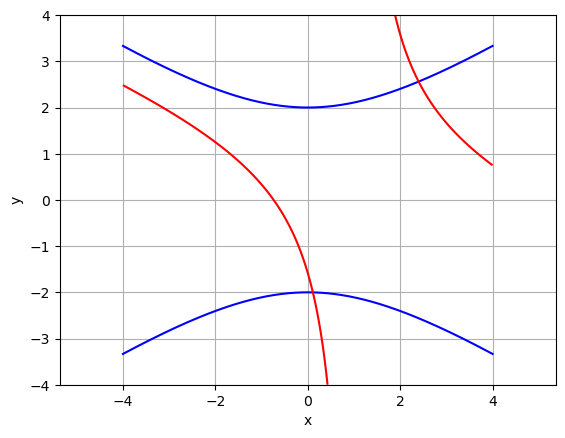

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# 生成x和y的数值范围
x = np.linspace(-np.sqrt(16), np.sqrt(16), 400)
y = np.linspace(-np.sqrt(16), np.sqrt(16), 400)

# 计算对应的y值
y1 = np.sqrt((36 + 4*x**2) / 9)

# 画出第一个双曲线的上半部分和下半部分，使用蓝色，并添加标签
plt.plot(x, y1, 'b', label='Hyperbola: -4x^2 + 9y^2 = 36')
plt.plot(x, -y1, 'b')

# 生成网格
X, Y = np.meshgrid(x, y)

# 计算第二个双曲线的值
Z = 5*X**2 + 12*X*Y - 22*X - 12*Y - 19

# 画出等高线图
plt.contour(X, Y, Z, levels=[0], colors='r')

# 添加标签
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axis('equal')

# 显示图例
# plt.legend()

# 显示图形
plt.show()

In [45]:
n = 5
# random a semi positive definite matrix A
A = np.random.rand(n,n)
A = A @ A.T
# Rayleigh quotient iteration
def rayleigh_quotient_iteration(A):
    x = np.random.rand(n)
    x = x/np.linalg.norm(x)
    quotient_list = []
    for i in range(10):
        y = A @ x
        x = y/np.linalg.norm(y)
        lambda_ = x @ A @ x
        quotient_list.append(lambda_)
    return lambda_,quotient_list
lambda_, quotient_list =rayleigh_quotient_iteration(A)

In [46]:
# eigenvector and eigenvalue by numpy
eigenvalues, eigenvectors = np.linalg.eig(A)

In [47]:
x = eigenvectors[:,0]

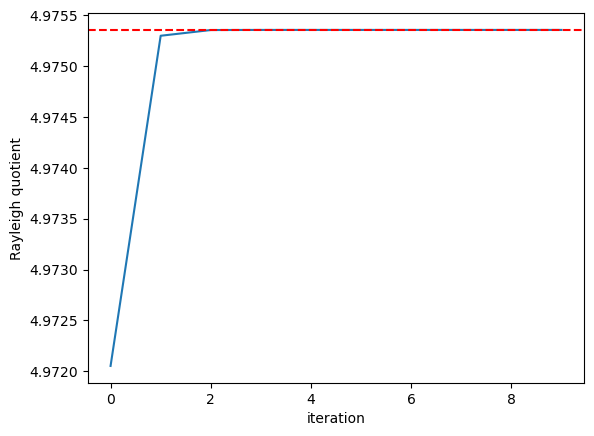

In [48]:
# plot the convergence of Rayleigh quotient iteration
plt.plot(quotient_list)
plt.xlabel('iteration')
plt.ylabel('Rayleigh quotient')
plt.axhline(y=eigenvalues[0], color='r', linestyle='--')

In [54]:
# B is a positive definite matrix
B = np.random.rand(n,n)
B = B @ B.T + np.eye(n)
# generalized Rayleigh quotient iteration
def generalized_rayleigh_quotient_iteration(A,B):
    x = np.random.rand(n)
    x = x/np.linalg.norm(x)
    quotient_list = []
    for i in range(10):
        y = np.linalg.inv(B) @ A @ x
        x = y/np.linalg.norm(y)
        lambda_ = x @ A @ x
        quotient_list.append(lambda_)
    return lambda_,quotient_list
lambda_, quotient_list = generalized_rayleigh_quotient_iteration(A,B)
# real eigenvalues and eigenvectors
# A_hat = B^(-1/2) @ A @ B^(-1/2)
# sepctral decomposition for B
eigenvalues_B, eigenvectors_B = np.linalg.eig(B)
B_sqrt = eigenvectors_B @ np.diag(np.sqrt(eigenvalues_B)) @ eigenvectors_B.T
B_invert_sqrt = eigenvectors_B @ np.diag(1/np.sqrt(eigenvalues_B)) @ eigenvectors_B.T
A_hat = B_invert_sqrt @ A @ B_invert_sqrt
eigenvalues_A_hat, eigenvectors_A_hat = np.linalg.eig(A_hat)
